# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import bokeh.plotting as bkp
#from mpl_toolkits.axes_grid1 import make_axes_locatable
import scipy.stats as st
#sns.set()

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/Users/alisonkline/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


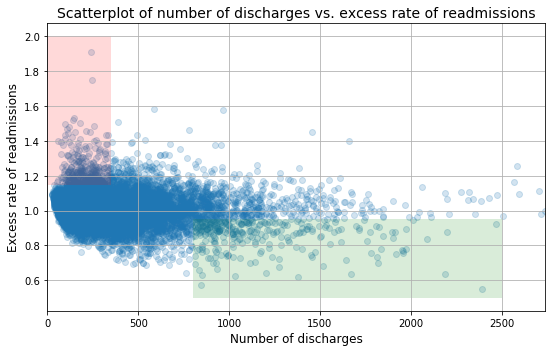

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [5]:
# Your turn

## Q-A. Do you agree with the above analysis and recommendations? Why or why not?
The analysis jumps to conclusions so although a few data points highlighted on the graph indicate that there maybe correlation between hospital capacity (number of discharges) and readmission rates its not a robust conclusion and actual business conclusions are premature.

- The data has a couple of discharge outliers removed without comment or explanation, when the readmission rate outliers are left. 
- The analysis does not calculate the strength of the relationship or its significance using any statistical methods
- The analysis conflates 'hospitals' with 'procedures' when there may be a relationship between hospital size rather than just the frequency of the procedure at the hospital
- Using absolute discharge numbers rather than some normalized or average 'rate' eg per week or month seems like it may be adding noise into the data by not helping each x value to have ~ same number of y observations. The data isn't smoothly sampled across the range of interest.

## Q-B. Provide support for your arguments and your own recommendations with a statistically sound analysis:
First exploring the data and the outliers - some but not all of which were ignored by the initial analysis.

In [6]:
clean_hospital_read_df.loc[:,'Measure Name'].value_counts()

READM-30-HF-HRRP          2841
READM-30-PN-HRRP          2799
READM-30-COPD-HRRP        2738
READM-30-AMI-HRRP         1807
READM-30-HIP-KNEE-HRRP    1393
Name: Measure Name, dtype: int64

In [7]:
print('There are {} observations in our data'.format(clean_hospital_read_df.shape[0]))
print('   across {} states'.format(len(clean_hospital_read_df.State.unique())))
print('   and {} different hospital providers'.format(len(clean_hospital_read_df.loc[:,'Provider Number'].unique())))

# why the graph is plotted as it is.
print('\nFirst 81 entries have 0 Number of Discharges {}'.format(
    [a for a in clean_hospital_read_df['Number of Discharges'][78:83]]))
print('Last 3 entries have over 3000 Number of Discharges {}'.format(
    [a for a in clean_hospital_read_df['Number of Discharges'][-5:]]))

print('First 81 entries have 0 Number of Discharges {}'.format(
    list(clean_hospital_read_df['Excess Readmission Ratio'][78:83])))
print('Last 3 entries have over 3000 Number of Discharges {}'.format(
    list(clean_hospital_read_df['Excess Readmission Ratio'][-5:])))

There are 11578 observations in our data
   across 51 states
   and 3036 different hospital providers

First 81 entries have 0 Number of Discharges [0, 0, 0, 25, 27]
Last 3 entries have over 3000 Number of Discharges [2716, 2740, 3570, 3980, 6793]
First 81 entries have 0 Number of Discharges [nan, nan, nan, 1.0914, 1.0961]
Last 3 entries have over 3000 Number of Discharges [0.9804, 1.0003, 1.0896, 0.7682, 0.7379]


In [8]:
# completing linear regression analysis to see if conclusion is valid
df_all = clean_hospital_read_df[['Number of Discharges','Excess Readmission Ratio']][81:]
df_no_big_dis = clean_hospital_read_df[['Number of Discharges','Excess Readmission Ratio']][81:-3]
df_no_big_err = df_all.sort_values('Excess Readmission Ratio')[:-2]
df_no_outs = df_no_big_dis.sort_values('Excess Readmission Ratio')[:-2]

print('data shapes for: \n   all hospitals:{}, \n   for those with <3000 discharges:{},'.format(
        df_all.shape, df_no_big_dis.shape))
print('   those <1.6 Excess Readmission Rate: {},\n   those with no outliers: {}'.format(
        df_no_big_err.shape, df_no_outs.shape))

x_all = list(df_all['Number of Discharges'])
y_all = list(df_all['Excess Readmission Ratio'])

x_no_big_dis = list(df_no_big_dis['Number of Discharges'])
y_no_big_dis = list(df_no_big_dis['Excess Readmission Ratio'])

x_no_big_err = list(df_no_big_err['Number of Discharges'])
y_no_big_err = list(df_no_big_err['Excess Readmission Ratio'])

x_no_outs = list(df_no_outs['Number of Discharges'])
y_no_outs = list(df_no_outs['Excess Readmission Ratio'])

# Perform a linear regression using np.polyfit(): a, b
a_all, b_all = np.polyfit(x_all, y_all, deg=1)
print('\nFor all data points                        y = {:.7f}x + {:.5f}'.format(a_all, b_all))
a_no_big_dis, b_no_big_dis = np.polyfit(x_no_big_dis, y_no_big_dis, deg=1)
print('Excluding big discharge hospitals          y = {:.7f}x + {:.5f}'.format(a_no_big_dis, b_no_big_dis))
a_no_big_err, b_no_big_err = np.polyfit(x_no_big_err, y_no_big_err, deg=1)
print('Excluding high Excess Readmission Ratios   y = {:.7f}x + {:.5f}'.format(a_no_big_err, b_no_big_err))
a_no_outs, b_no_outs = np.polyfit(x_no_outs, y_no_outs, deg=1)
print('Excluding both groups of outliers          y = {:.7f}x + {:.5f}'.format(a_no_outs, b_no_outs))

# Make theoretical line to plot using the hypothesized model, 2 pts per line only as line is straight.
xl = np.array([0, 6790])
yl_all = a_all * xl + b_all
yl_no_outs = a_no_outs * xl + b_no_outs

lin_cross = (1-b_all)/a_all
print('\nLinear regression line crosses y-1 at x value: {:.0f}'.format(lin_cross))

data shapes for: 
   all hospitals:(11497, 2), 
   for those with <3000 discharges:(11494, 2),
   those <1.6 Excess Readmission Rate: (11495, 2),
   those with no outliers: (11492, 2)

For all data points                        y = -0.0000290x + 1.01811
Excluding big discharge hospitals          y = -0.0000286x + 1.01795
Excluding high Excess Readmission Ratios   y = -0.0000288x + 1.01790
Excluding both groups of outliers          y = -0.0000284x + 1.01774

Linear regression line crosses y-1 at x value: 624


The graph provided in the initial analysis was claiming that there was a correlation between hospitals with a large discharge numbers for a procedure and lower rates of Excess readmissions, however the analysis did not actually complete a linear regression analysis nor evaluate the strength of the relationship.

Here I have completed a linear regression analysis. I analyzed the impact of outliers to both large numbers of discharges and Excess Readmission Rates. Removing the outliers gives the strongest relationship between large discharge numbers however the difference is tiny. The outliers can be ignored or included and make no meaningful difference to the analysis.

Below is the original plot with the linear regression lines for all the data and the data excluding both sets of outliers.

The validity of a linear regression approach is however questionable because there are more hospitals completing procedures with smaller discharge numbers, so for any given discharge rates it is not clear that the Excess Readmission Rate will be independent of procedure frequency aka discharge numbers.

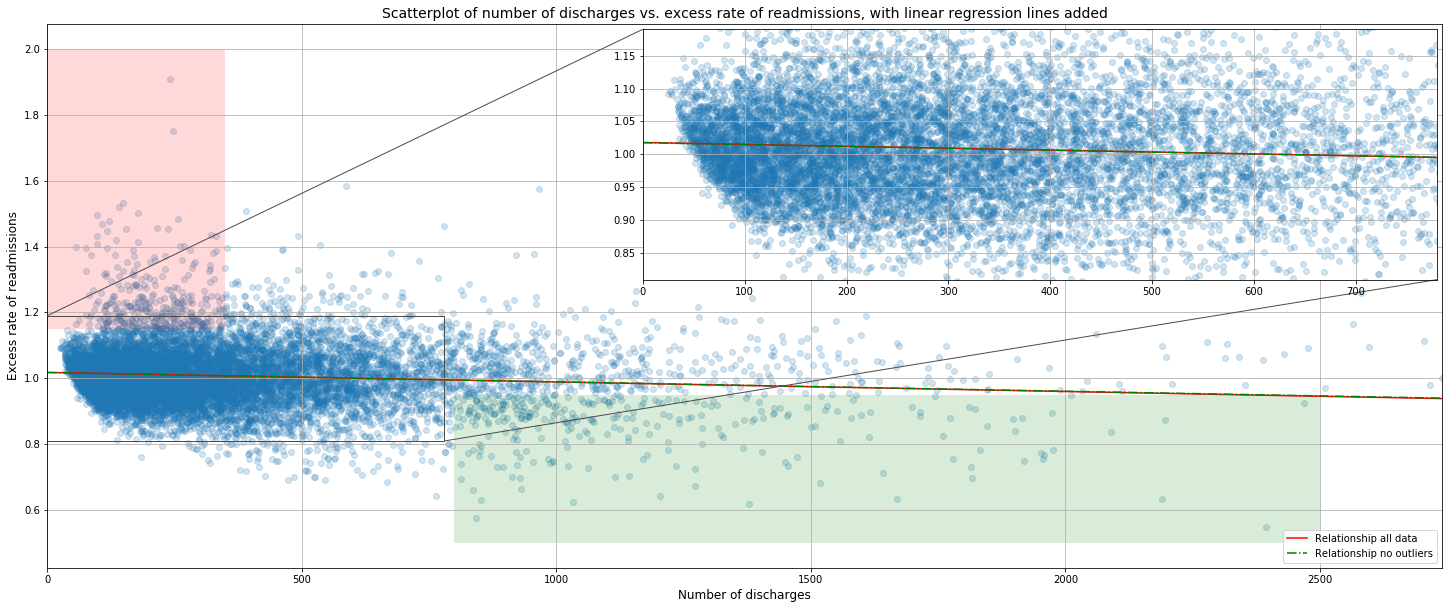

In [9]:
#
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

#Creating plot
fig, ax = plt.subplots(figsize=(25,10))
ax.scatter(x_all, y_all, alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions, with linear regression lines added', fontsize=14)

ax.grid(True)

# Add regression line to your plot
_ = ax.plot(xl, yl_all, color='r', label = 'Relationship all data')
_ = ax.plot(xl, yl_no_outs, color='g', linestyle='-.', label='Relationship no outliers')
ax.legend(loc=4)

axins = zoomed_inset_axes(ax, 2.0, loc=1)
axins.scatter(x_all, y_all, alpha=0.2)
_ = axins.plot(xl, yl_all, color='r')
_ = axins.plot(xl, yl_no_outs, color='g', linestyle='-.')
axins.grid(True)

x1, x2, y1, y2 = 0, 780, 0.81, 1.19 # specify the limits
axins.set_xlim(x1, x2) # apply the x-limits
axins.set_ylim(y1, y2)
mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec='0.3')

plt.show()

In [10]:
corr_mat = np.corrcoef(x_all, y_all)
print('The Pearson coefficient: {:.5}, also indicates that there maybe some correlation.'.format(corr_mat[0,1]))

The Pearson coefficient: -0.097398, also indicates that there maybe some correlation.


The analysis also claimed that the relationship was statistically significant, where it is possible that it is just easier to score a high rate of readmissions when there are fewer total discharges for a particular procedure, as any one readmission with have a stronger individual affect on the calculated readmission rate.

The analysis talked at a hospital level when actually the observations have been made at a procedure level.

Completing a pairs permutation test on Pearson-r coefficient :
 - H0: the of 'Excess rate of readmissions' score and the 'number of discharges' for a hospital procedure is independent.
 - Ha: They are related
 - alpha = 0.01 (given) ie 99% confident and a tail of 0.005 for at 2 tail test.
 
 I'm going to permute the 'Number of discharges' against the observed 'Excess rate of readmissions' and see how the pearson correlation coefficient changes.

In [11]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    corr_mat = np.corrcoef(x,y)
    return corr_mat[0,1]

In [12]:
# Compute observed correlation: r_obs
r_obs = pearson_r(x_all, y_all)

# Initialize permutation replicates: perm_replicates
perm_replicates = np.empty(10000)

# Draw replicates
for i in range(10000):
    # Permute number of discharges
    d_permuted = np.random.permutation(x_all)

    # Compute Pearson correlation
    perm_replicates[i] = pearson_r(d_permuted, y_all)

In [13]:
# Compute p-value: p
p = np.sum(perm_replicates <= r_obs)/len(perm_replicates)
print('p-val =', p)
print('critical z value: {:.5f} for alpha: {} 2 tail.'.format(abs(st.norm.ppf(0.005)),0.01))
print('Confidence interval = 0 +/- standard error = {:.5}'.format(np.std(perm_replicates)))
[cil, ciu] = st.norm.ppf(0.005)*np.std(perm_replicates)*np.array([-1,1])
print('Confidence interval: {:.5f} to {:.5f}'.format(cil, ciu))

p-val = 0.0
critical z value: 2.57583 for alpha: 0.01 2 tail.
Confidence interval = 0 +/- standard error = 0.0094033
Confidence interval: 0.02422 to -0.02422


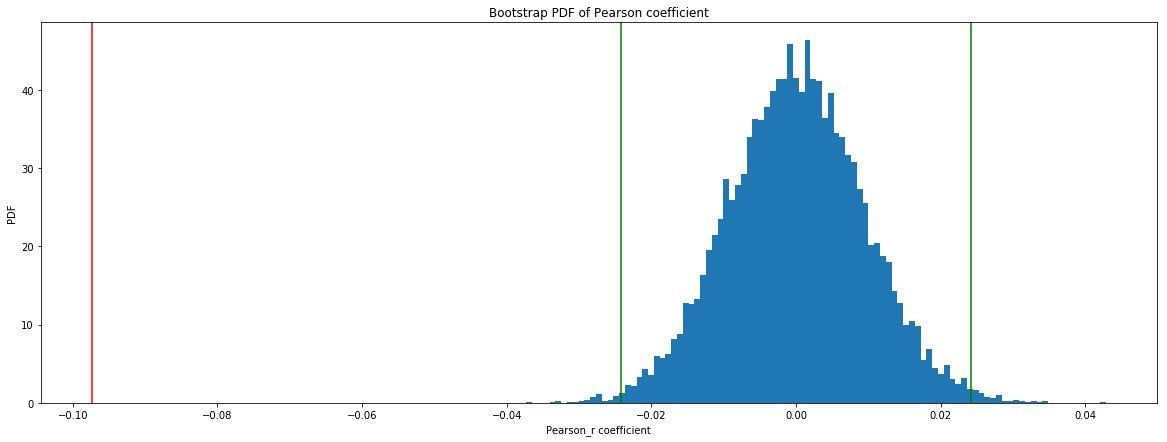

In [14]:
fig, ax = plt.subplots(figsize=(20,7))
ax.hist(perm_replicates, bins=100, density=True)
ax.axvline(r_obs, color='r')
ax.axvline(cil, color='g')
ax.axvline(ciu, color='g')
ax.set_xlabel('Pearson_r coefficient')
ax.set_ylabel('PDF')
ax.set_title('Bootstrap PDF of Pearson coefficient')
plt.show()

Given this strong (p is way smaller than 0.01) result we can reject the null hypothesis we are 99% confident that there is a correlation and hospitals that have a larger number of discharges for a procedure are likely to have a lower Excess Rate of Readmissions

Another approach would be to split the observed data into two groups and then test to see if the means of these groups have statistically different values.

The groups could be procedure counts:
- above and below 100 - marking small hospital departments in the initial analysis, 
- above and below 300 - where the initial analysis actually recommended policy changes,
- above and below 624 - where the linear regression analysis cross' Excess Rate of Readmissions =1
- above and below 1000 - marking large hospital departments in the initial analysis,

You could also split the observations by those with Excess Rate of Readmissions rates above and below 1

Its not clear in the data where the group de-markations should fall - perhaps looking at it on a log scale for Number of discharges will help - it will even out the density of the observations making our samples more normal:


For all data points                        y = -0.0117143x + 1.07327


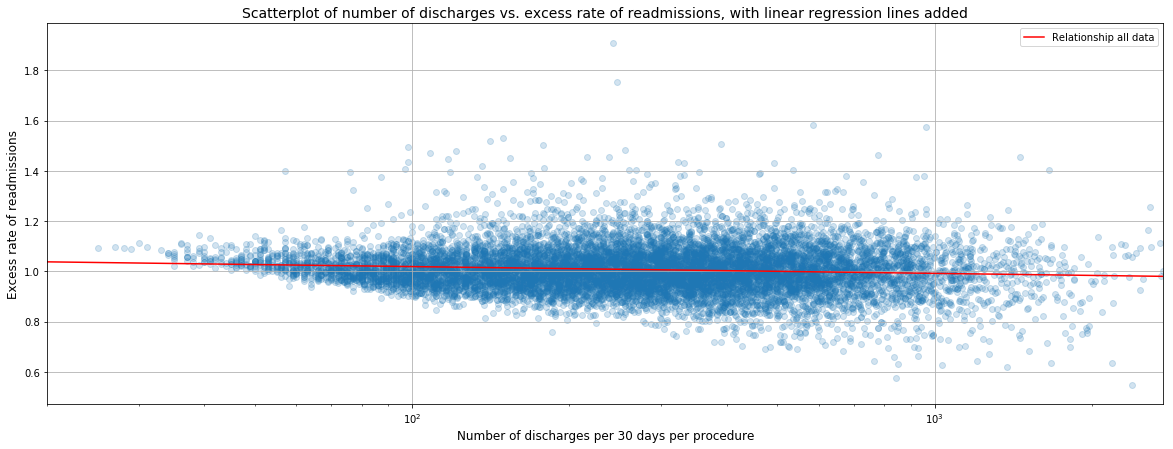

In [15]:
#Creating plot
fig, ax = plt.subplots(figsize=(20,7))
ax.set_xscale('log')
ax.scatter(x_all, y_all, alpha=0.2)

ax.set_xlim([20, max(x)])
ax.set_xlabel('Number of discharges per 30 days per procedure', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions, with linear regression lines added', fontsize=14)

ax.grid(True)

# Add regression line to your plot

# Perform a linear regression using np.polyfit(): a, b
a_l_all, b_l_all = np.polyfit(np.log(x_all), y_all, deg=1)
print('\nFor all data points                        y = {:.7f}x + {:.5f}'.format(a_l_all, b_l_all))
xl = np.array([20, 5000])
yll_all = a_l_all * np.log(xl) + b_l_all

_ = ax.plot(xl, yll_all, color='r', label = 'Relationship all data')
ax.legend(loc=1)

plt.show()

## Calculating significance for different size cut off points.

In [16]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1) / n
    return x, y

In [17]:
df2 = clean_hospital_read_df.loc[:,['Number of Discharges','Excess Readmission Ratio','Measure Name']]
# Drop nulls 
df2.dropna(axis=0, how='any', subset=['Excess Readmission Ratio'], inplace=True)

- H0 = Number of Discharges doesn't affect the Excess Readmission Ratio ie Difference in mean(Excess Readmission Ratio) = 0
- Ha = small hospitals have a larger Excess Readmission Ratio
- alpha = 0.01

In [18]:
small = 100
df2['Size'] = 'Big'
df2.loc[df2['Number of Discharges']<small,'Size'] = 'Small'
sm = df2[df2.Size == 'Small']
bg = df2[df2.Size == 'Big']

we have 1188 observations of small departments, and 10309 observations of large departments


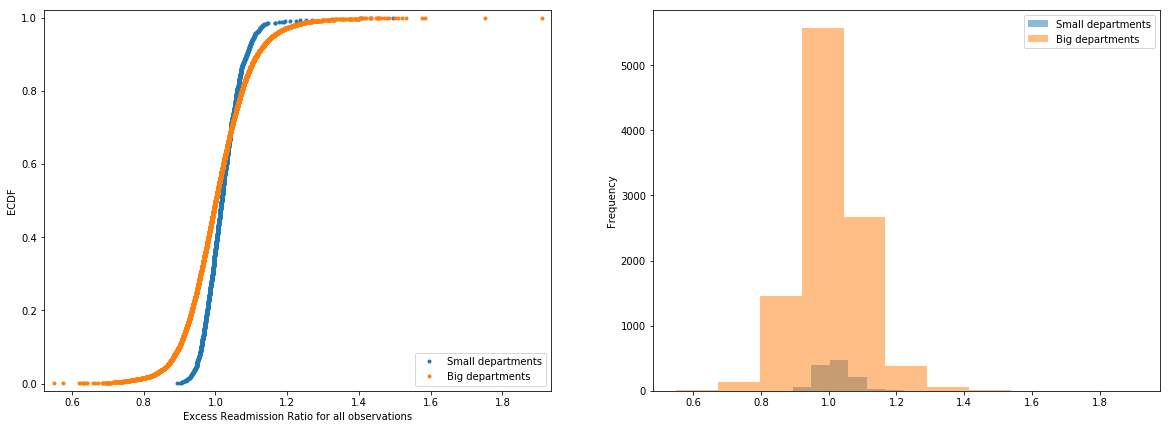

calculated t-statistic: 8.758343
with p value: 4.118464e-18

Sample does not indicate that the two population's mean are equal (reject H0) with 99% confidence


In [19]:
a,b = sm['Excess Readmission Ratio'],bg['Excess Readmission Ratio']
n,m = len(a),len(b)
print('we have {} observations of small departments, and {} observations of large departments'.format(n,m))

fig, [ax1,ax2] = plt.subplots(1,2,figsize=(20,7))

# Compute values for and plot ECDFs
x_sm, y_sm = ecdf(a)
x_bg, y_bg = ecdf(b)
ax1.plot(x_sm, y_sm, marker='.', linestyle='none')
ax1.plot(x_bg, y_bg, marker='.', linestyle='none')

# Label and show plot
ax1.margins(0.02)
ax1.legend(('Small departments', 'Big departments'), loc='lower right')
ax1.set_xlabel('Excess Readmission Ratio for all observations')
ax1.set_ylabel('ECDF')

a.plot(kind='hist', bins=11, alpha=0.5, label='Small departments')
b.plot(kind='hist', bins=11, alpha=0.5, label='Big departments')
plt.legend()

plt.show()

t, pt = st.ttest_ind(a, b, equal_var = False)       # 2-sample two sided test from samples
print('calculated t-statistic: {:.7}'.format(t))
print('with p value: {:.7}'.format(pt))

if pt > 0.01:
    print("\nSample indicates that the two population's mean are the same (fail to reject H0)")
else:
    print("\nSample does not indicate that the two population's mean are equal (reject H0) with 99% confidence")

In [20]:
pd.DataFrame({'Size_cut':[100,300,624,1000],
'num_sm_dpts':[1188,6108,9867,11033],
'num_bg_deps':[10309,5389,1630,464],
't-stat':[8.758343,8.279706,6.193044,5.397695],
'p-value':[4.118464e-18,1.38621e-16,7.151175e-10,1.057797e-07],
'test_outcome':['reject H0','reject H0','reject H0','reject H0']}).set_index('Size_cut')


,num_sm_dpts,num_bg_deps,t-stat,p-value,test_outcome
Size_cut,,,,,
100,1188,10309,8.758343,4.118464e-18,reject H0
300,6108,5389,8.279706,1.386210e-16,reject H0
624,9867,1630,6.193044,7.151175e-10,reject H0
1000,11033,464,5.397695,1.057797e-07,reject H0


Regardless where you put the demarkation of large and small departments we can say with 99% confidence in every case that there was a statistically significant difference in mean Excess Readmission Ratio for the two groups

## Digging deeper, looking at the per Measure data

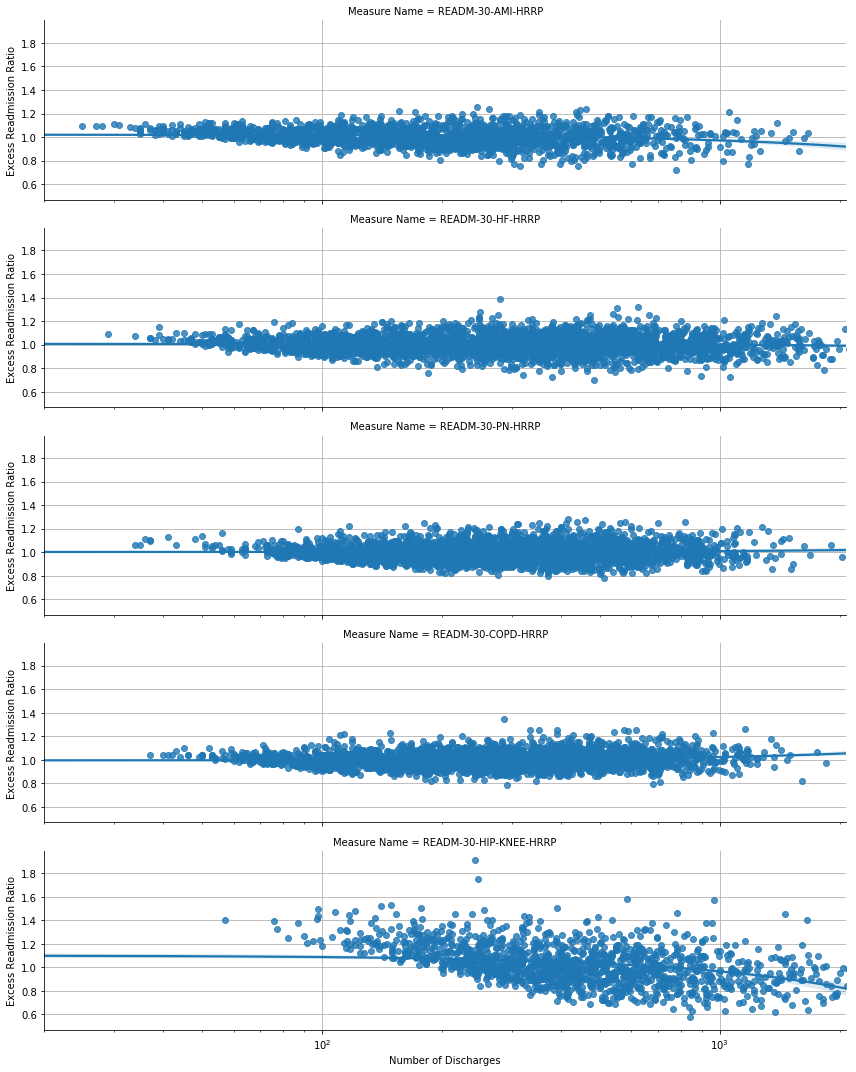

In [21]:
sns.set_style({'axes.axisbelow': True,'axes.grid': True})
g = sns.FacetGrid(df2, row="Measure Name", aspect=4)
g.set(xscale="log")
g = g.map(sns.regplot, 'Number of Discharges','Excess Readmission Ratio')

Interestingly there are:
- two procedures where the department size correlation holds as expected: heart attack (acute myocardial infection - AMI) & hip/knee replacement - HIP/KNEE,
- two neutral where the department size seems to have a more neutral impact: heart failure - HF, pneumonia - PN
- one where small departments appear to have a better ERR than big ones: , chronic obstructive pulmonary disease - COPD

I'm now going to group my data by 'Excess Readmission Ratio' if the ERR is >1 the department has 'Good' outcomes, if the ERR is < 1 it has 'Poor' outcomes.

I going to use 2 sample t-tests to test the following hypothesis:
- H0: The mean log(size of departments) with 'Poor' outcomes is the same as the mean log(size of departments) with 'Good' outcomes, ie mean(log(Poor))-mean(log(Good)) = 0
- Ha: the mean log(size of departments) with 'Poor' outcomes is larger or smaller
- $\alpha$ = 0.01 (two tail)

In [22]:
df3 = df2.loc[:,['Number of Discharges','Excess Readmission Ratio','Measure Name']]
df3['Outcome'] = 'Poor'
df3.loc[df3['Excess Readmission Ratio']<1,'Outcome'] = 'Good'
df3['logNoD'] = np.log(df3['Number of Discharges'])

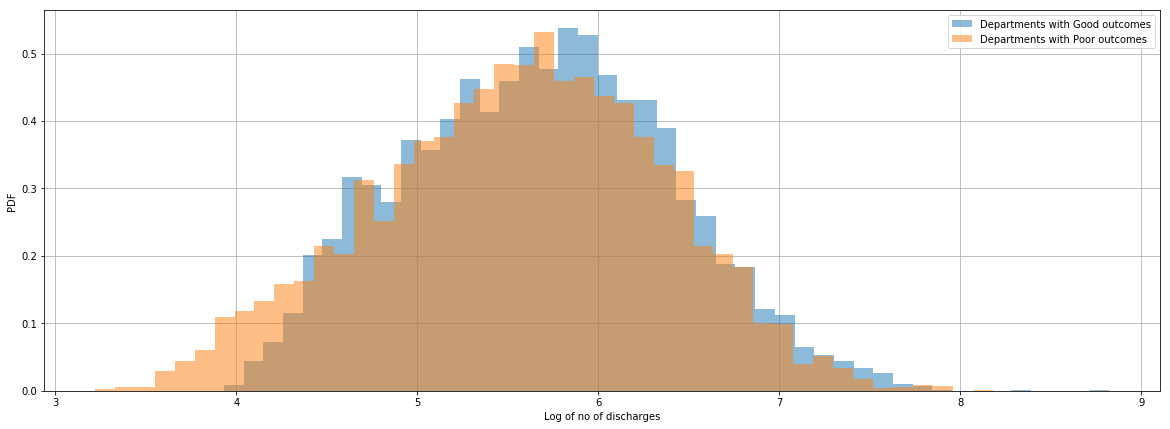

In [37]:
#Creating plot
fig, ax = plt.subplots(figsize=(20,7))
bins=45
ax.hist(df3.loc[df3.Outcome =='Good','logNoD'], bins=bins, density=True, alpha=0.5, label='Departments with Good outcomes')
ax.hist(df3.loc[df3.Outcome =='Poor','logNoD'], bins=bins, density=True, alpha=0.5, label='Departments with Poor outcomes')
ax.set_xlabel('Log of no of discharges')
ax.set_ylabel('PDF')
ax.legend(loc=1)
plt.show()

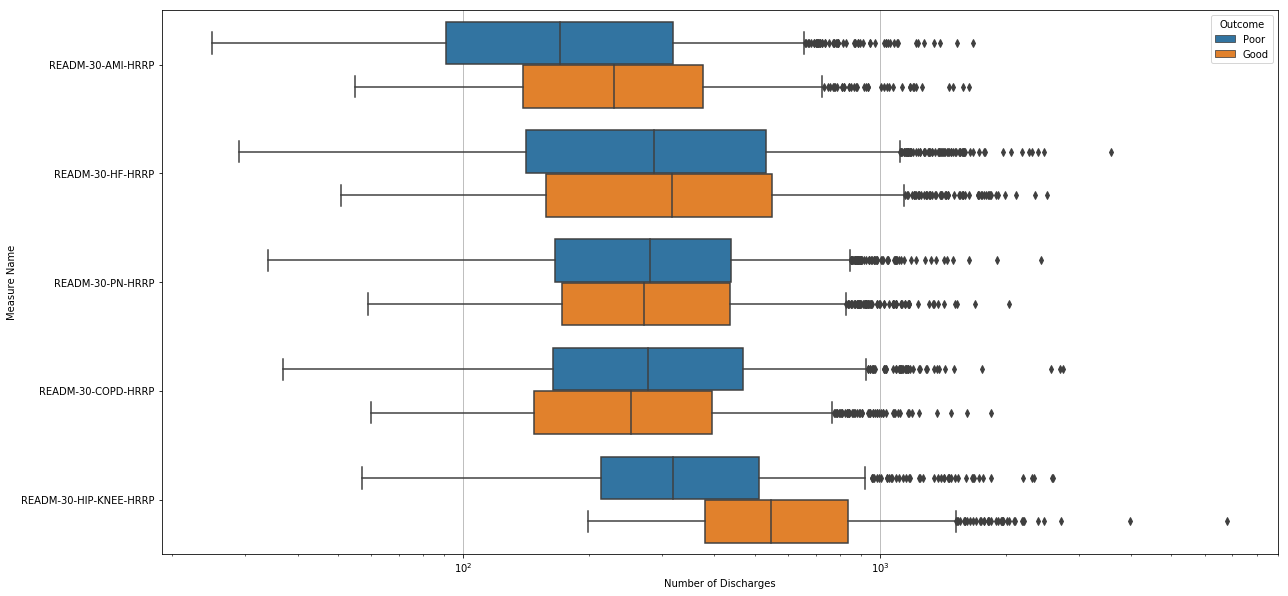

In [24]:
fig, ax = plt.subplots(figsize=(20,10))
ax.set_xscale('log')
sns.boxplot(y='Measure Name', x='Number of Discharges', hue='Outcome', data=df3, orient='h')
plt.show()

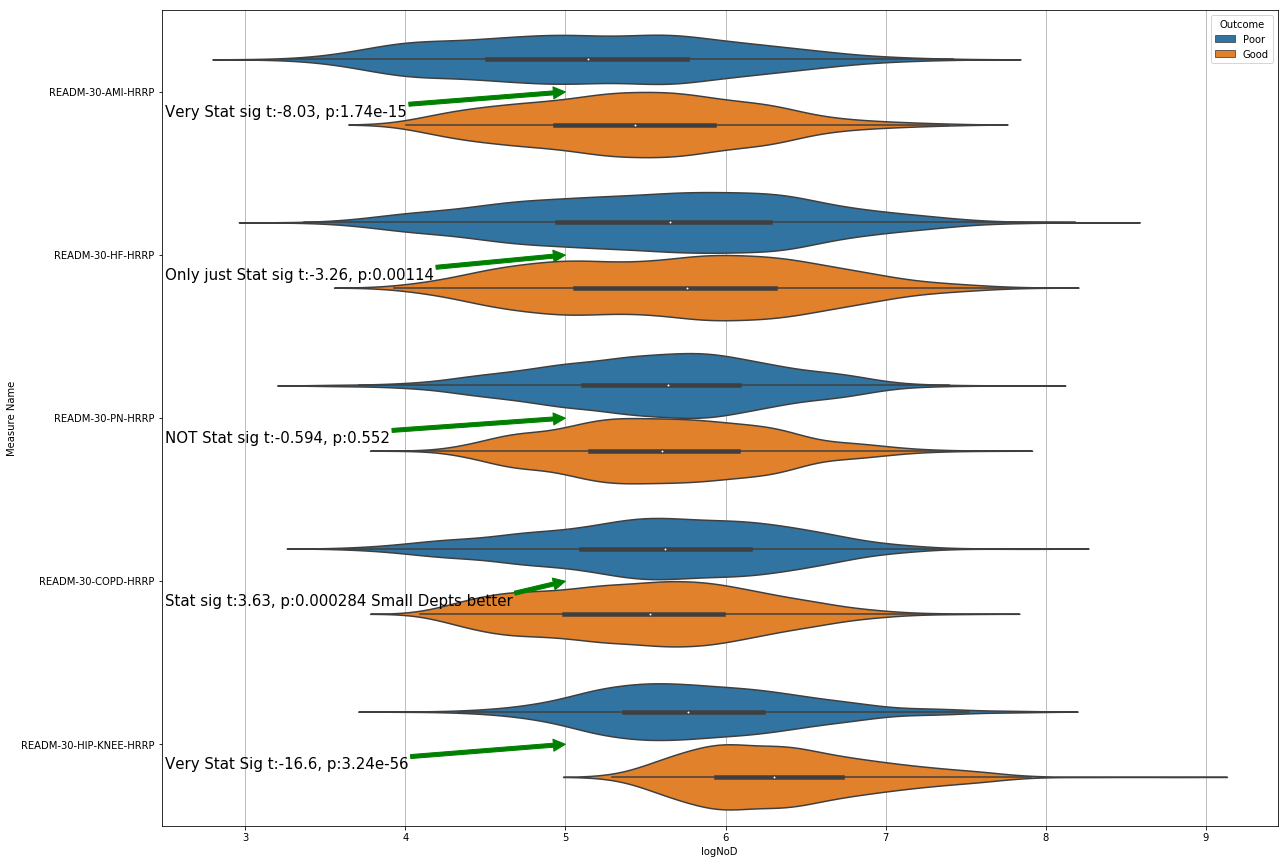

In [38]:
fig, ax = plt.subplots(figsize=(20,15))
#ax.set_yscale('log')
sns.violinplot(y='Measure Name', x='logNoD', hue='Outcome', data=df3, orient='h')
plt.annotate('Very Stat sig t:-8.03, p:1.74e-15', xy=(5, 0.0), xytext=(2.5, 0.15),
             arrowprops={'color':'g'},fontsize=15)
plt.annotate('Only just Stat sig t:-3.26, p:0.00114', xy=(5, 1.0), xytext=(2.5, 1.15),
             arrowprops={'color':'g'},fontsize=15)
plt.annotate('NOT Stat sig t:-0.594, p:0.552', xy=(5, 2.0), xytext=(2.5, 2.15),
             arrowprops={'color':'g'},fontsize=15)
plt.annotate('Stat sig t:3.63, p:0.000284 Small Depts better', xy=(5, 3.0), xytext=(2.5, 3.15),
             arrowprops={'color':'g'},fontsize=15)
plt.annotate('Very Stat Sig t:-16.6, p:3.24e-56', xy=(5, 4.0), xytext=(2.5, 4.15),
             arrowprops={'color':'g'},fontsize=15)
plt.show()

In [26]:
df3['Measure Name'].unique()

array(['READM-30-AMI-HRRP', 'READM-30-HF-HRRP', 'READM-30-PN-HRRP',
       'READM-30-COPD-HRRP', 'READM-30-HIP-KNEE-HRRP'], dtype=object)

In [27]:
def test_hy(pt):
    if pt > 0.01:
        print("\nSample indicates that the two population's mean are the same (fail to reject H0), \nDepartment size may not be important for this proceedure.")
    else:
        print("\nSample does not indicate that the two population's mean are equal (reject H0) with 99% confidence, \nDepartment size is important for this proceedure.")

In [28]:
a = df3[(df3['Measure Name'].isin(['READM-30-AMI-HRRP'])) & (df3['Outcome']=='Poor')]
b = df3[(df3['Measure Name'].isin(['READM-30-AMI-HRRP'])) & (df3['Outcome']=='Good')]
t, pt = st.ttest_ind(a.logNoD, b.logNoD, equal_var = False)       # 2-sample two sided test from samples
print('calculated t-statistic: {:.7}'.format(t))
print('with p value: {:.7}'.format(pt))
test_hy(pt)

calculated t-statistic: -8.031193
with p value: 1.741205e-15

Sample does not indicate that the two population's mean are equal (reject H0) with 99% confidence, 
Department size is important for this proceedure.


In [29]:
a = df3[(df3['Measure Name'].isin(['READM-30-HF-HRRP'])) & (df3['Outcome']=='Poor')]
b = df3[(df3['Measure Name'].isin(['READM-30-HF-HRRP'])) & (df3['Outcome']=='Good')]
t, pt = st.ttest_ind(a.logNoD, b.logNoD, equal_var = False)       # 2-sample two sided test from samples
print('calculated t-statistic: {:.7}'.format(t))
print('with p value: {:.7}'.format(pt))
test_hy(pt)

calculated t-statistic: -3.25652
with p value: 0.001141209

Sample does not indicate that the two population's mean are equal (reject H0) with 99% confidence, 
Department size is important for this proceedure.


In [30]:
a = df3[(df3['Measure Name'].isin(['READM-30-PN-HRRP'])) & (df3['Outcome']=='Poor')]
b = df3[(df3['Measure Name'].isin(['READM-30-PN-HRRP'])) & (df3['Outcome']=='Good')]
t, pt = st.ttest_ind(a.logNoD, b.logNoD, equal_var = False)       # 2-sample two sided test from samples
print('calculated t-statistic: {:.7}'.format(t))
print('with p value: {:.7}'.format(pt))
test_hy(pt)

calculated t-statistic: -0.5942978
with p value: 0.5523616

Sample indicates that the two population's mean are the same (fail to reject H0), 
Department size may not be important for this proceedure.


In [31]:
a = df3[(df3['Measure Name'].isin(['READM-30-COPD-HRRP'])) & (df3['Outcome']=='Poor')]
b = df3[(df3['Measure Name'].isin(['READM-30-COPD-HRRP'])) & (df3['Outcome']=='Good')]
t, pt = st.ttest_ind(a.logNoD, b.logNoD, equal_var = False)       # 2-sample two sided test from samples
print('calculated t-statistic: {:.7}'.format(t))
print('with p value: {:.7}'.format(pt))
test_hy(pt)

calculated t-statistic: 3.634298
with p value: 0.0002839309

Sample does not indicate that the two population's mean are equal (reject H0) with 99% confidence, 
Department size is important for this proceedure.


In [32]:
a = df3[(df3['Measure Name'].isin(['READM-30-HIP-KNEE-HRRP'])) & (df3['Outcome']=='Poor')]
b = df3[(df3['Measure Name'].isin(['READM-30-HIP-KNEE-HRRP'])) & (df3['Outcome']=='Good')]
t, pt = st.ttest_ind(a.logNoD, b.logNoD, equal_var = False)       # 2-sample two sided test from samples
print('calculated t-statistic: {:.7}'.format(t))
print('with p value: {:.7}'.format(pt))
test_hy(pt)

calculated t-statistic: -16.55258
with p value: 3.244036e-56

Sample does not indicate that the two population's mean are equal (reject H0) with 99% confidence, 
Department size is important for this proceedure.


## Q.B part 4 Statistical and practical significance
In the business world knowing the direction of a result with some certainly not necessarily 95% or 99% may still be enough to make a decision - waiting for an arbitrary level of confidence may just cause the business to waste time that could be better spent on another experiment or data cycles.

Even in academia or government it can be important to fully investigate and understand your results before acting. In this case why is it that some procedures have more sensitivity to department size vs others? Is it that the procedure its self is very complex and having a surgical team who is super experienced and performing this particular surgery daily is the most important factor. These types of procedures should perhaps be centralized where possible to region 'expert' centers, or a focus put on developing remote operating procedures so that the location of the patient can be de-coupled from the location of the expert surgeon.  

That said we should also look to understand why some procedures are not effected by department size READM-30-PN-HRRP or buck the trend and have a lower Excess Readmission Ratio in small departments READM-30-COPD-HRRP. Are outcomes for these illness more affected by quality of nursing care? or infection control - things that may be easier to focus on and get right in a smaller possibly quieter environment.

It is too simplistic to brand small hospitals lacking in resources. The next stage would be to investigate some of the these secondary hypothesis to try to tease out the reason for the variation.

## Q.B part 5 Look at the scatterplot above.
What are the advantages and disadvantages of using this plot to convey information?
Construct another plot that conveys the same information in a more direct manner.

Advantages: axis are easy to understand, red and green areas show a reader who glances the high-level message

Disadvantages: size of the effect is not quantified, and its statistical validity isn't justified. Some data is missing without comment, The correlation is not explicitly shown.

My preferred graph for showing the generalized correlation between small Departments and Excess Rate of Readmissions is this one:

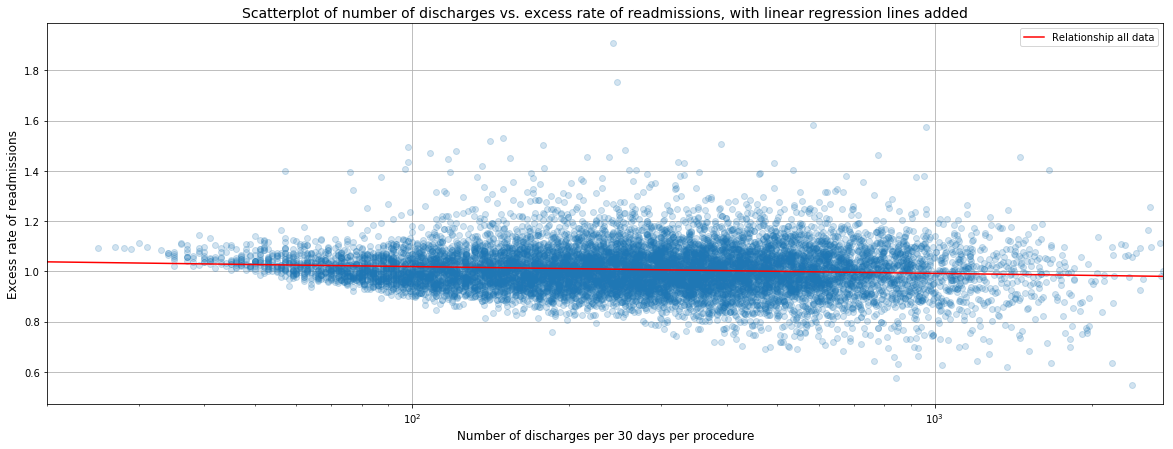

In [33]:
#Creating plot
fig, ax = plt.subplots(figsize=(20,7))
ax.set_xscale('log')
ax.scatter(x_all, y_all, alpha=0.2)

ax.set_xlim([20, max(x)])
ax.set_xlabel('Number of discharges per 30 days per procedure', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions, with linear regression lines added', fontsize=14)

ax.grid(True)

# Add regression line to your plot

# Perform a linear regression using np.polyfit(): a, b
a_l_all, b_l_all = np.polyfit(np.log(x_all), y_all, deg=1)
xl = np.array([20, 5000])
yll_all = a_l_all * np.log(xl) + b_l_all

_ = ax.plot(xl, yll_all, color='r', label = 'Relationship all data')
ax.legend(loc=1)

plt.show()